<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Homewrok: Neural Networks 2</center></h2>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

RND_SEED = 7
np.random.seed(RND_SEED)

%matplotlib inline

# Intro

For this homework you are propossed to 
1. implement autoencoder model based on Keras library using MNIST sample.
2. set up your own dataset for transfer learning and apply pretrained model

# Autoencoders


Idea of autoencoders is illustrated in the following figure:
<center><img src='img/autoencoder_schema.jpg'></center>

Autoencoder consists of two parts: encoder and decoder.
Encoder takes an image and encodes it into another image or vector with smaller size. In other words, it compresses the image. On the other hand, decoder takes the compressed image and reconstructs the original image. If the autoencoder is designed and fitted properly, the original and reconstructed images will be similar. 

# Fully-connected Autoencoder

Consider an autoencoder which consists only fully-connected layers (no convolutions, no pooling et al.) as it is show in figure:

<center><img src='img/ae.png'></center>

This autoencoder takes an image as a vector and encodes it into a vector of smaller size. Its output is a reconstructed image represented as a vector of the same size as the input. 

## Task 1 (1 point)

Download and read MNIST sample. Plot several images. Do all preprocessing steps needed for the autoencoder.

Hint: use `from tensorflow.keras.datasets import mnist`

In [0]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
n_train, _, _ = X_train.shape
n_test, _, _ = X_test.shape

n_train, n_test

(60000, 10000)

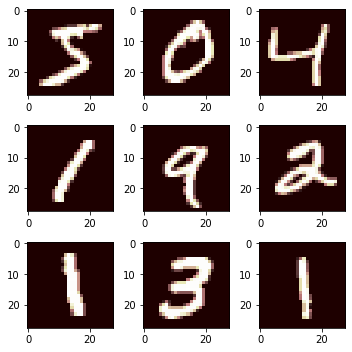

In [5]:
plt.figure(figsize=(5,5))
x, y = 3, 3
for i in range(x*y):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.pink, interpolation='nearest')
plt.tight_layout()
plt.show()

In [0]:
# Scale X
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

## Task 2 (3 points)

Implement your autoencoder using Keras library with the following structure:
- **Encoder** has one fully-connected layer, that compresses an input image into a vector of size 49.
- **Decoder** has one fully-connected layer, that reconstructs the original image. 

Fit your autoencoder during 5 epochs. Use **mse** error function.

Hint: see Keras examples from your seminars.

In [7]:
X_train_nn = X_train.reshape((n_train, -1, ))
X_test_nn = X_test.reshape((n_test, -1, ))
print('X_train:    ', X_train.shape)
print('X_train_nn: ', X_train_nn.shape)

X_train:     (60000, 28, 28)
X_train_nn:  (60000, 784)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Convolution2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import initializers

model = Sequential() 
model.add(Dense(units=49, 
                input_shape=X_train_nn[0].shape,
                activation='sigmoid'))

model.add(Dense(units=X_train_nn.shape[1], 
                activation='sigmoid'))

model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 49)                38465     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               39200     
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X_train_nn, 
          X_train_nn, 
          epochs=5, 
          validation_data=(X_train_nn, X_train_nn))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0647 - val_loss: 0.0513
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0427 - val_loss: 0.0367
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0336 - val_loss: 0.0311
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0295 - val_loss: 0.0281
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0273 - val_loss: 0.0265


## Task 3 (1 point)

Test your autoencoder. Calculate MSE error between inputs and outputs of the autoencoder. Plot several input and output images. Are they similar? 

#### MSE

In [0]:
from sklearn.metrics import mean_squared_error

In [11]:
pred = model.predict(X_test_nn)
print("MSE: ", mean_squared_error(X_test_nn, pred))

MSE:  0.026216557


#### Images

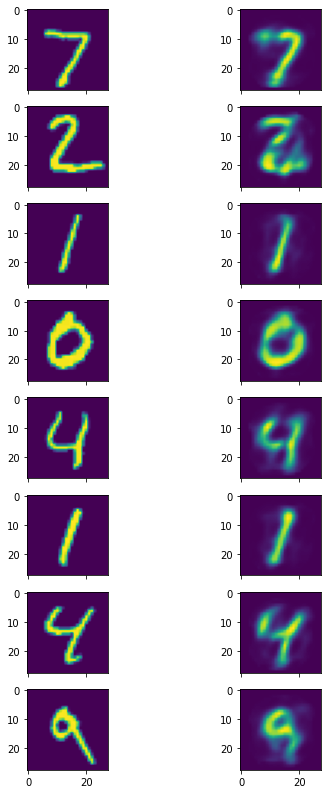

In [12]:
pred_img = pred.reshape(X_test.shape)

rows, columns = 8, 2
_, ax = plt.subplots(rows, columns, sharex=True, figsize=(7, 14))

for i in range(rows):
  ax[i, 0].imshow(X_test[i])
  ax[i, 1].imshow(pred_img[i])
plt.show()

# Transfer Learning

In this task you should construct your own dataset to perform classification or regression task.
For instance you can
* Predict age (age group) given face image
* Classify different types of vehicles on the image
* Classify smartphone models
* [Your Idea Here]

Write down your task: Классифицировать изображения на аккордеоны и баяны

## Task 4 (3 points)

Construct your dataset
* It should be you handmade raw dataset (not loaded completely in the web by someone else)
* It should contain at least 500 images (the more - the better)
* Once collected it should be downloadable via `wget` command in terminal (if you have windows you can check it in Google Collab) - for instance use dropbox or Yandex.Disk to get the link

Helpful links: [1](https://www.pyimagesearch.com/2018/04/09/how-to-quickly-build-a-deep-learning-image-dataset/), [2](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)

In [0]:
import cv2
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [70]:
!wget "https://www.dropbox.com/s/hsm97hbzzi5s0vp/images.zip?dl=0" -O images.zip

--2020-05-27 16:58:15--  https://www.dropbox.com/s/hsm97hbzzi5s0vp/images.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hsm97hbzzi5s0vp/images.zip [following]
--2020-05-27 16:58:15--  https://www.dropbox.com/s/raw/hsm97hbzzi5s0vp/images.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3c23bbdb2428a33e7e115aba70.dl.dropboxusercontent.com/cd/0/inline/A4imy7Rjk8V3pa_-6FY1TP62V2RkiAGBvKxfiw6Zi4fOdOCHJK6DJYEbG6Cajx1LMWDsa-SWF0Os1SftJOurGCDROWYCpYsDVsBZC1AaJlxhJteulGF0iujR2sYvwaACjkk/file# [following]
--2020-05-27 16:58:16--  https://uc3c23bbdb2428a33e7e115aba70.dl.dropboxusercontent.com/cd/0/inline/A4imy7Rjk8V3pa_-6FY1TP62V2RkiAGBvKxfiw6Zi4fOdOCHJK6DJYEbG6Cajx1LMWDsa-SWF0Os1SftJOurGCDROWYCpYsDVsBZC1AaJlxhJteulG

In [71]:
!unzip images.zip

Archive:  images.zip
replace images/bayan/00000000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: images/bayan/00000000.jpg  
  inflating: images/bayan/00000001.jpg  
  inflating: images/bayan/00000002.jpg  
  inflating: images/bayan/00000003.jpg  
  inflating: images/bayan/00000004.jpg  
  inflating: images/bayan/00000005.jpg  
  inflating: images/bayan/00000006.jpg  
  inflating: images/bayan/00000007.jpg  
  inflating: images/bayan/00000008.jpg  
  inflating: images/bayan/00000009.jpg  
  inflating: images/bayan/00000010.jpg  
  inflating: images/bayan/00000011.jpg  
  inflating: images/bayan/00000012.jpg  
  inflating: images/bayan/00000013.jpg  
  inflating: images/bayan/00000014.jpg  
  inflating: images/bayan/00000015.jpg  
  inflating: images/bayan/00000016.jpg  
  inflating: images/bayan/00000017.jpg  
  inflating: images/bayan/00000018.jpg  
  inflating: images/bayan/00000019.jpg  
  inflating: images/bayan/00000020.jpg  
  inflating: images/bayan/00000021.jpg  
  

## Task 5 (1 point)

Prepare your dataset to be put through your model

* Resize and normalize images
* Split data in train and validation sets
* Prepare data generator with image augmentation for training set

In [0]:
img_width, img_height = 256, 256
batch_size = 64
epochs = 5
num_classes = 2

In [0]:
bayans = []
for image_path in glob.glob('./images/bayan/*.jpg'):
    try:
        bayan = cv2.imread(image_path)
        bayan = cv2.resize(bayan, (img_width, img_height))
        bayans.append(bayan)
    except Exception as e:
        print(e)

In [0]:
accordeons = []
for image_path in glob.glob('./images/accordeons/*.jpg'):
    try:
        accordeon = cv2.imread(image_path)
        accordeon = cv2.resize(accordeon, (img_width, img_height))
        accordeons.append(accordeon)
    except Exception as e:
        print(e)

In [0]:
images = bayans + accordeons
labels = [0] * len(bayans) + [1] * len(accordeons)

images = np.array(images).astype(np.float32)
labels = np.array(labels).astype(np.float32)

In [0]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [0]:
datagen = ImageDataGenerator(
    horizontal_flip = True,
    fill_mode = "nearest",
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range=0.3,
    rotation_range=30
)

## Task 6 (1 point)

* Use any pretrained model and replace dence layers
* Freeze (make untrainable) all weight except for dence layers weights and train your model
* Report train and validation losses
* Unfreeze other weights, report train validation losses

In [0]:
from tensorflow.keras import applications

In [0]:
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

In [0]:
for layer in model.layers[:5]:
    layer.trainable = False

In [0]:
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

In [0]:
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = "categorical_crossentropy", 
                    optimizer = optimizers.SGD(lr=0.001, momentum=0.9), 
                    metrics=["accuracy"])

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [0]:
checkpoint = ModelCheckpoint("vgg19_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [0]:
model_final.fit(datagen.flow(X_train, y_train,
                            batch_size=batch_size),
                    epochs=10,
                    steps_per_epoch=32,
                    validation_data=(X_test, y_test),
                    workers=4,
                    callbacks=[checkpoint, early])

Epoch 1/10
32/32 [==============================] - 3449s 108s/step - loss: 1.3060 - accuracy: 0.5214 - val_loss: 0.6925 - val_accuracy: 0.5340
Epoch 2/10
24/32 [=====================>........] - ETA: 13:38 - loss: 0.6925 - accuracy: 0.5234

In [0]:
y_pred = model_final.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy_score(y_pred=y_pred_labels, y_true=y_test[:,1])